In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [6]:
data_path = "../data/MentalRotation.csv"
df = pd.read_csv(data_path)

In [7]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


## How many subjects do we have?

In [10]:
len(df.Subject.unique())

54

## How many trials per subject?

In [19]:
n_entries_per_subject = df.groupby("Subject").apply(len).values
unique_trials = df.groupby("Subject").apply(lambda dd: len(dd.Trial.unique())).values

(n_entries_per_subject == unique_trials).all()

True

In [20]:
unique_trials

array([96, 93, 94, 95, 95, 96, 96, 96, 95, 91, 94, 94, 88, 96, 95, 95, 95,
       89, 85, 96, 94, 92, 96, 94, 94, 95, 95, 96, 90, 91, 92, 95, 95, 95,
       95, 96, 96, 95, 96, 93, 95, 96, 94, 91, 92, 93, 92, 94, 96, 94, 96,
       95, 91, 93])

## Relationship between angle diff and response time for correct answers

In [23]:
df[df.Correct == 1]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M
...,...,...,...,...,...,...,...,...,...
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F


<Axes: xlabel='Angle', ylabel='Time'>

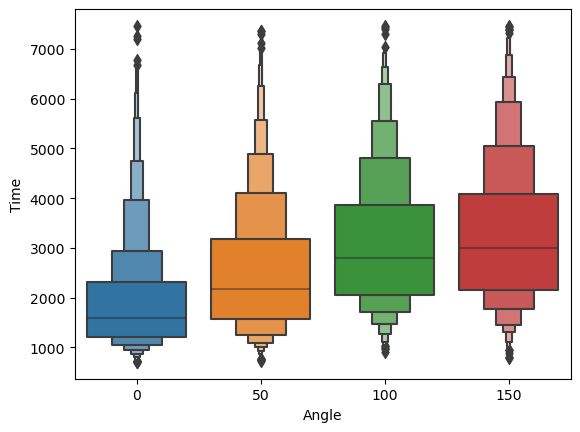

In [25]:
sns.boxenplot(data=df[df.Correct == 1], x="Angle", y="Time")

## What about incorrect answers

<Axes: xlabel='Angle', ylabel='Time'>

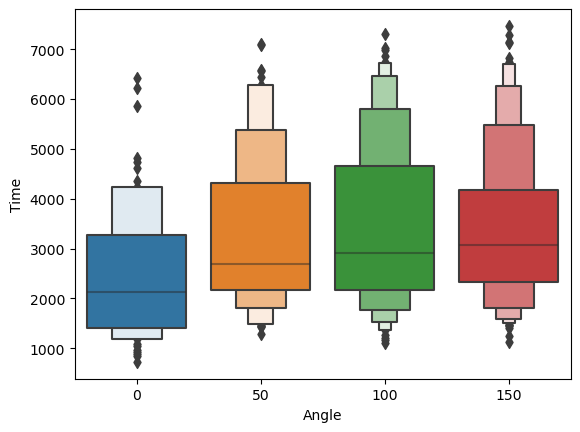

In [26]:
sns.boxenplot(data=df[df.Correct == 0], x="Angle", y="Time")

## Is the task more difficult when the angle is bigger?

In [63]:
dd = df.groupby(["Angle", "Subject"]).apply(lambda dd: dd.Correct.mean()).reset_index()
dd.rename(columns={0: "FractionCorrect"}, inplace=True)

<Axes: xlabel='Angle', ylabel='FractionCorrect'>

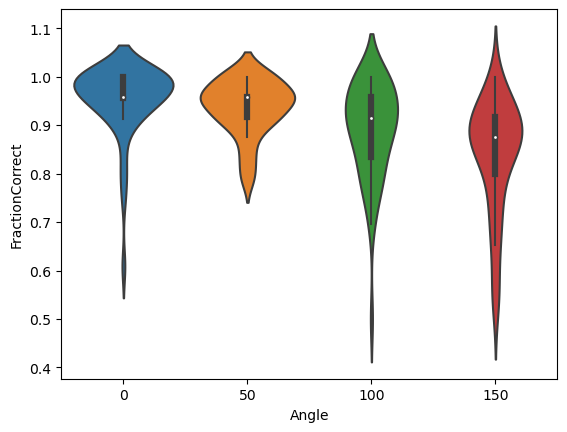

In [68]:
sns.violinplot(data=dd, x="Angle", y="FractionCorrect")